In [3]:
import pandas as pd

# Load the dataset using the relative path
file_path = r'C:\Users\xuefe\Desktop\Team Project 2\data\processed\cleaned_data1.csv'
data = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
print(data.head())
print(data.columns)



   OCC_YEAR  OCC_DAY  OCC_DOY  OCC_HOUR  LONG_WGS84  LAT_WGS84  \
0    2013.0     31.0    365.0        17  -79.306754  43.734654   
1    2014.0      1.0      1.0        15  -79.236119  43.721827   
2    2013.0     25.0    359.0         0  -79.529692  43.618988   
3    2014.0      2.0      2.0         9  -79.313796  43.688101   
4    2014.0      2.0      2.0         1  -79.273925  43.813557   

   OCC_MONTH_April  OCC_MONTH_August  OCC_MONTH_December  OCC_MONTH_February  \
0            False             False                True               False   
1            False             False               False               False   
2            False             False                True               False   
3            False             False               False               False   
4            False             False               False               False   

   ...  NEIGHBOURHOOD_158_Woburn North (142)  \
0  ...                                 False   
1  ...                    

In [7]:
# Convert OCC_DAY and OCC_HOUR to integers for easier processing
data['OCC_DAY'] = data['OCC_DAY'].astype(int)
data['OCC_HOUR'] = data['OCC_HOUR'].astype(int)

# Aggregate the data by day of the week and hour
# Assuming OCC_DAY corresponds to day of the week (1 = Monday, 7 = Sunday)
# and OCC_HOUR corresponds to the hour of the day
grouped_data = data.groupby(['OCC_DAY', 'OCC_HOUR']).size().reset_index(name='Incidents')

# Pivot the data for easier visualization
pivot_data = grouped_data.pivot(index='OCC_HOUR', columns='OCC_DAY', values='Incidents')

# Display the aggregated data
pivot_data.head()


OCC_DAY,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
OCC_HOUR,,,,,,,,,,,,,,,,,,,,,
0,237,113,112,110,108,119,130,111,111,127,...,137,134,141,130,133,145,143,105,101,73
1,66,84,85,70,80,68,75,67,56,60,...,79,77,77,61,71,62,65,74,78,42
2,69,74,78,68,63,79,70,84,74,54,...,59,77,72,75,72,65,71,71,63,42
3,67,65,55,37,84,57,61,59,80,57,...,64,51,55,61,74,63,57,52,58,35
4,67,54,54,54,52,49,53,60,49,62,...,59,80,50,43,53,56,51,46,35,27


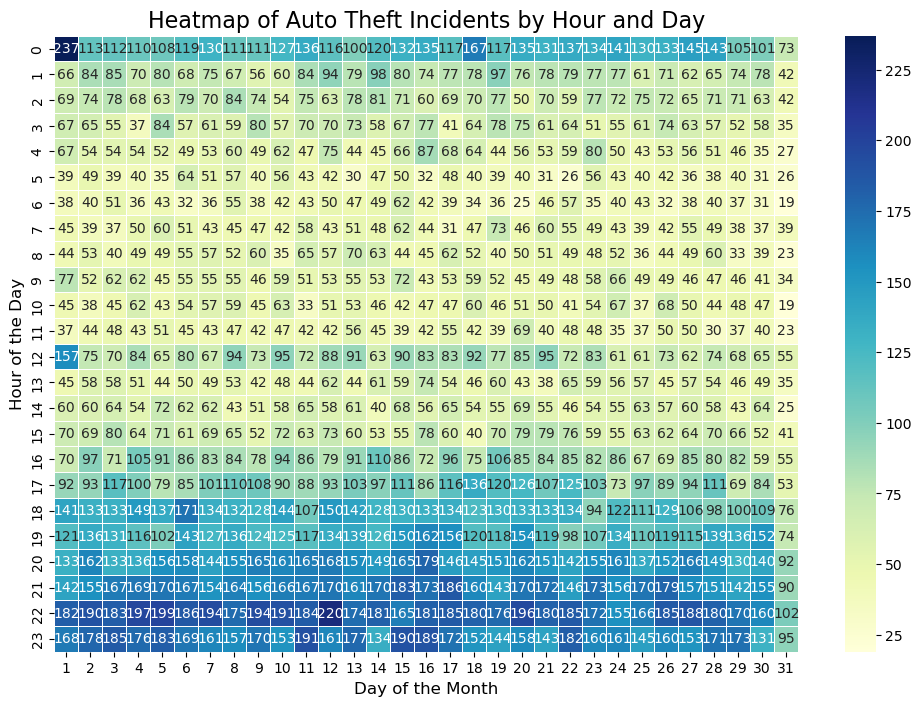

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set up the figure for the heatmap
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the frequency of incidents by hour and day
sns.heatmap(pivot_data, cmap="YlGnBu", linewidths=.5, annot=True, fmt="d")

# Add titles and labels
plt.title("Heatmap of Auto Theft Incidents by Hour and Day", fontsize=16)
plt.xlabel("Day of the Month", fontsize=12)
plt.ylabel("Hour of the Day", fontsize=12)

# Show the plot
plt.show()


In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Prepare the data for regression
# Using OCC_DAY and OCC_HOUR as features, and Incidents as the target variable
X = grouped_data[['OCC_DAY', 'OCC_HOUR']]
y = grouped_data['Incidents']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

# Display the model's coefficients and the mean squared error
model.coef_, model.intercept_, mse


(array([-0.5004121 ,  4.14233823]), 45.90497538655182, 1234.5738014642152)

OCC_DAY,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
OCC_HOUR,,,,,,,,,,,,,,,,,,,,,
0,237,113,112,110,108,119,130,111,111,127,...,137,134,141,130,133,145,143,105,101,73
1,66,84,85,70,80,68,75,67,56,60,...,79,77,77,61,71,62,65,74,78,42
2,69,74,78,68,63,79,70,84,74,54,...,59,77,72,75,72,65,71,71,63,42
3,67,65,55,37,84,57,61,59,80,57,...,64,51,55,61,74,63,57,52,58,35
4,67,54,54,54,52,49,53,60,49,62,...,59,80,50,43,53,56,51,46,35,27
